# Import & function

In [207]:
from PIL import Image, ImageDraw

import os
import numpy as np
import math

# Convert to grayscale & cut

In [208]:
display_resolution = 1920/1080 # stim presentation display resolution
screenshot_resolution = 1517/854 # measured by snipaste (grid on)
print(display_resolution), print(screenshot_resolution)
print(display_resolution - screenshot_resolution) # aspect ratio error 0.1%

grating_diameter_screenshot = 440 # grating radius pixel in screenshot
print(grating_diameter_screenshot / 854 * 1080), print(grating_diameter_screenshot / 1517 * 1920)
grating_diameter = math.ceil(np.max([grating_diameter_screenshot / 854 * 1080, 
                                grating_diameter_screenshot / 1517 * 1920])) # estimations are similar
grating_diameter # this should also be the radius of natural image cropped to squares

1.7777777777777777
1.7763466042154568
0.0014311735623209199
556.440281030445
556.8885959129861


557

In [237]:
def crop(input_path, input_img, chunk_height, chunk_width, save_path):

    if input_path[-1] != "/": input_path = input_path + "/"
    if save_path[-1] != "/": save_path = save_path + "/" # input_path & save_path must end with slash
    input_full = input_path + input_img
    
    im = Image.open(input_full).convert('L') # convert to grayscale
    img_width, img_height = im.size
#     print(img_width), print(img_height)
    
    k = 0
    for i in range(0, img_height-chunk_height, chunk_height):
        for j in range(0, img_width-chunk_width, chunk_width):
            
            box = (j, i, j+chunk_width, i+chunk_height)
            chunk = im.crop(box) # cut into square piece
            
            lum_img = Image.new('L', [chunk_height, chunk_width] , 0) # 'L' is grayscale without alpha
            draw = ImageDraw.Draw(lum_img)
            draw.pieslice([(0,0), (chunk_height, chunk_width)], 0, 360, 
                          fill = 255, outline = "white")
            chunk_arr =np.array(chunk)
            lum_img_arr =np.array(lum_img)
            chunk_circle = np.dstack((chunk_arr, lum_img_arr)) # cut square into circle
            chunk_circle = Image.fromarray(chunk_circle)
            display(chunk_circle)
            
            chunk_circle.save(save_path + input_img[:-4] + "_" + str(k) + ".png")
            k = k+1
    

(557, 557)


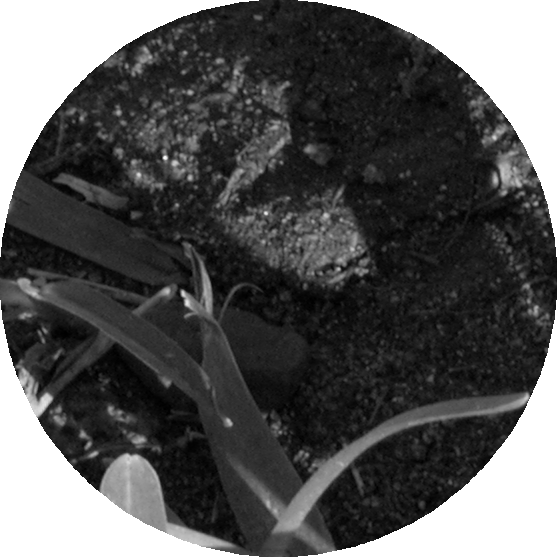

(557, 557)


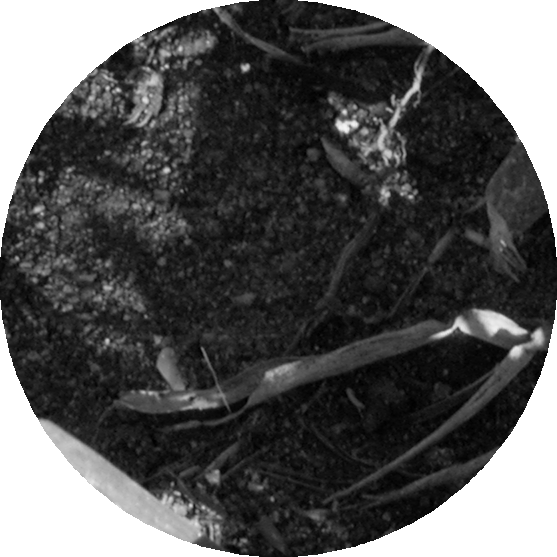

(557, 557)


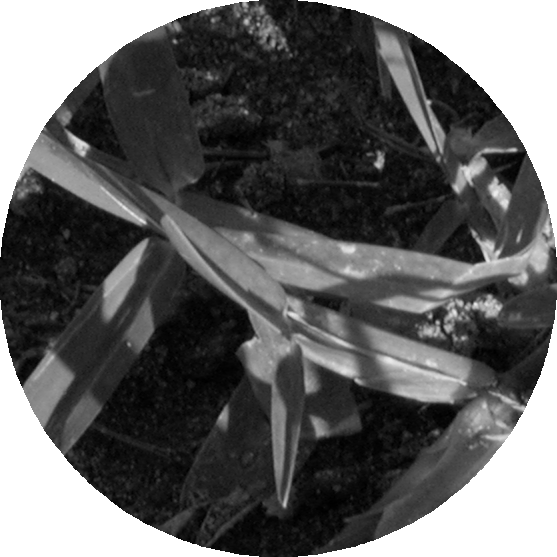

(557, 557)


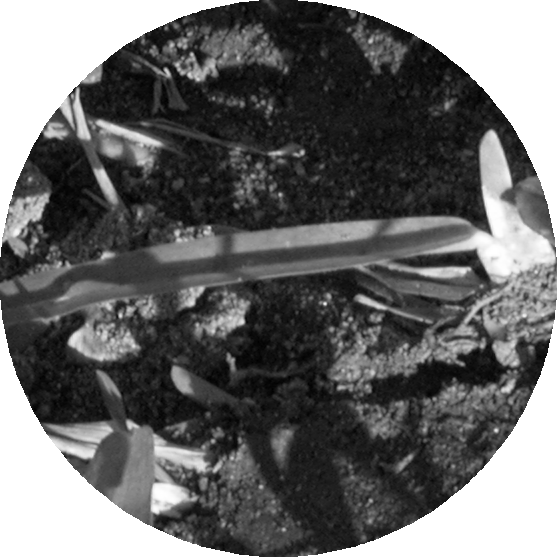

(557, 557)


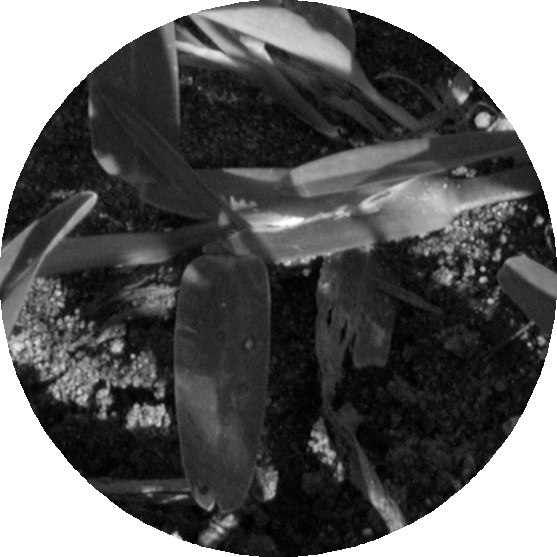

(557, 557)


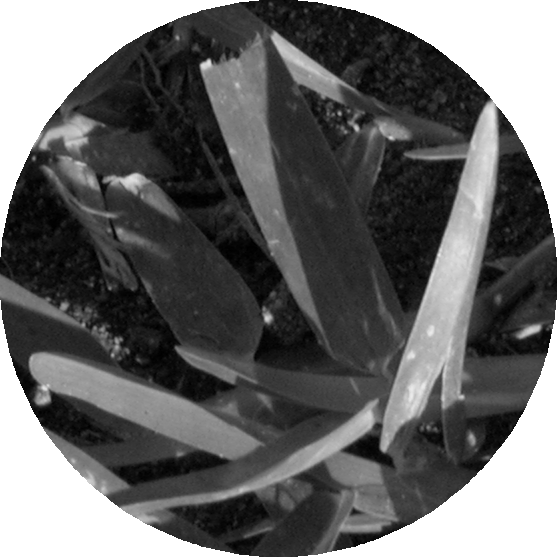

(557, 557)


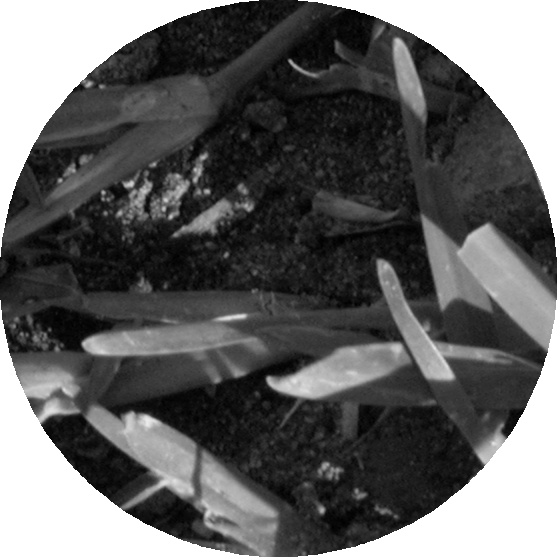

(557, 557)


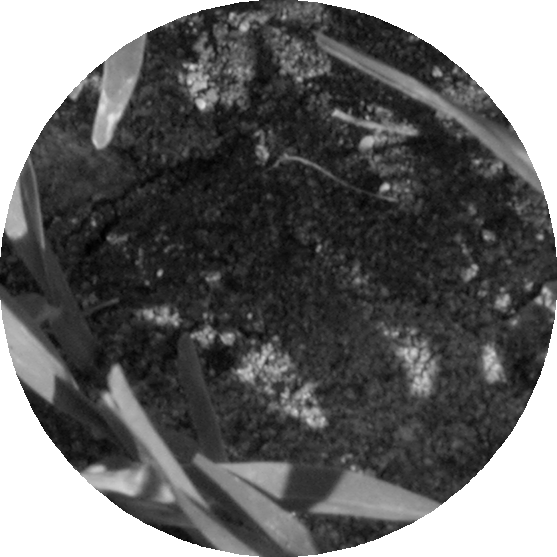

(557, 557)


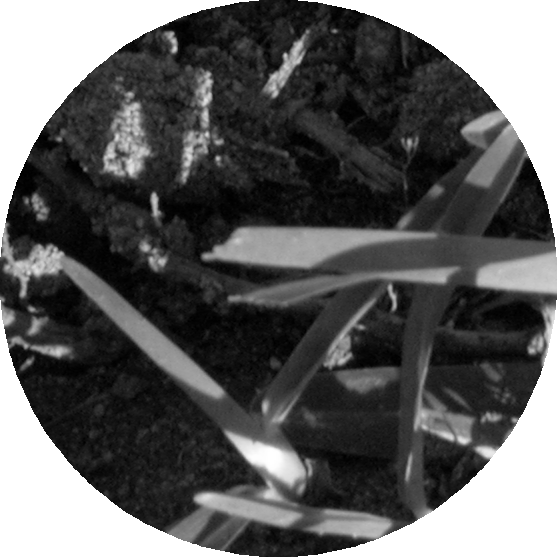

(557, 557)


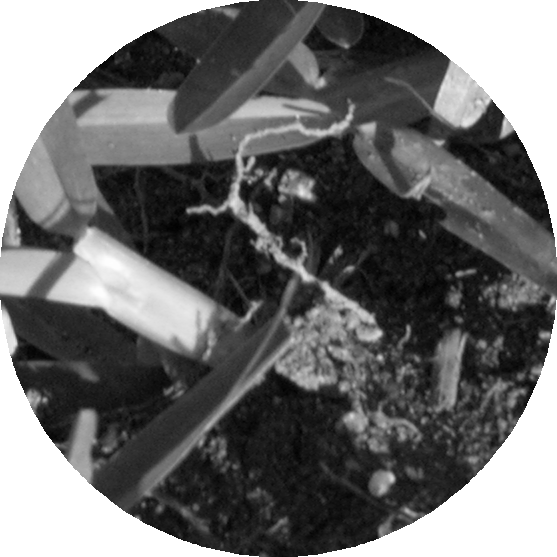

(557, 557)


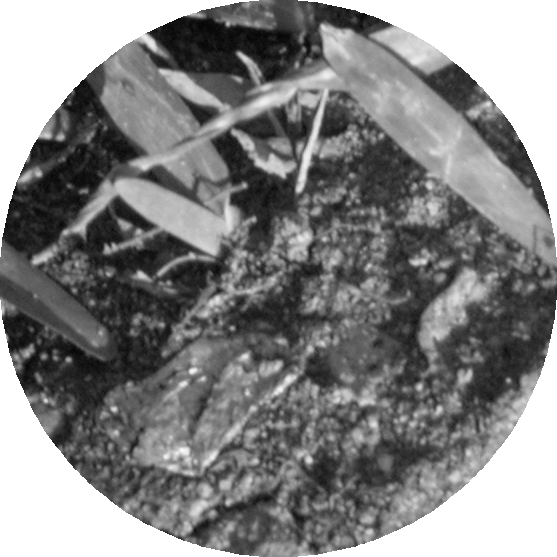

(557, 557)


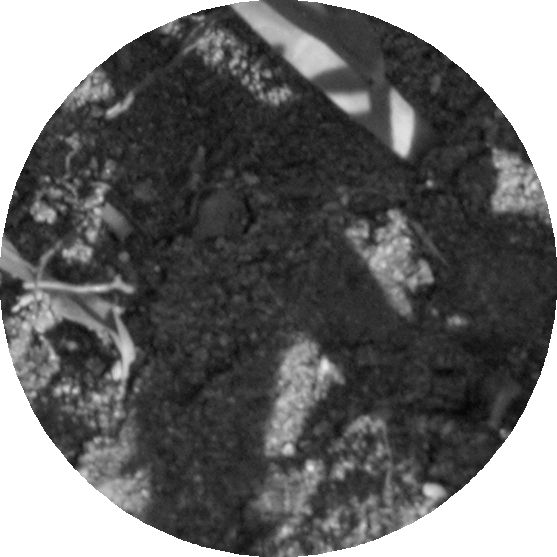

In [238]:
input_path = 'Z:/All_Staff/home/lan/Data/stimulus_image/McGill/Shadows_high_reso/'
save_path = 'C:/Users/lan/Documents/repos/inter/code/mwork/cut/'

input_img = 'merry_mexico0141.TIF'
chunk_height = grating_diameter
chunk_width = grating_diameter

crop(input_path, input_img, chunk_height, chunk_width, save_path)

In [257]:
def gmask(input_path, input_img, chunk_height, chunk_width, save_path):

    if input_path[-1] != "/": input_path = input_path + "/"
    if save_path[-1] != "/": save_path = save_path + "/" # input_path & save_path must end with slash
    input_full = input_path + input_img
    
    im = Image.open(input_full).convert('L') # convert to grayscale
    img_width, img_height = im.size
#     print(img_width), print(img_height)
    
    k = 0
    for i in range(0, img_height-chunk_height, chunk_height):
        for j in range(0, img_width-chunk_width, chunk_width):
            
            box = (j, i, j+chunk_width, i+chunk_height)
            chunk = im.crop(box) # cut into square piece
            
#             lum_img = Image.new('L', [chunk_height, chunk_width] , 0) # 'L' is grayscale without alpha
            lum_img = Image.fromarray(mask_flat_peak) # mask_flat_peak
            draw = ImageDraw.Draw(lum_img)
            draw.pieslice([(0,0), (chunk_height, chunk_width)], 0, 360, 
                          fill = 255, outline = "white")
            chunk_arr =np.array(chunk)
            lum_img_arr =np.array(lum_img)
            chunk_circle = np.dstack((chunk_arr, lum_img_arr)) # cut square into circle
#             chunk_circle = Image.fromarray(chunk_circle)
            chunk_circle = Image.fromarray((chunk_circle * 255).astype(np.uint8))
            display(chunk_circle)
            
#             chunk_circle.save(save_path + input_img[:-4] + "_" + str(k) + ".png")
            k = k+1
    

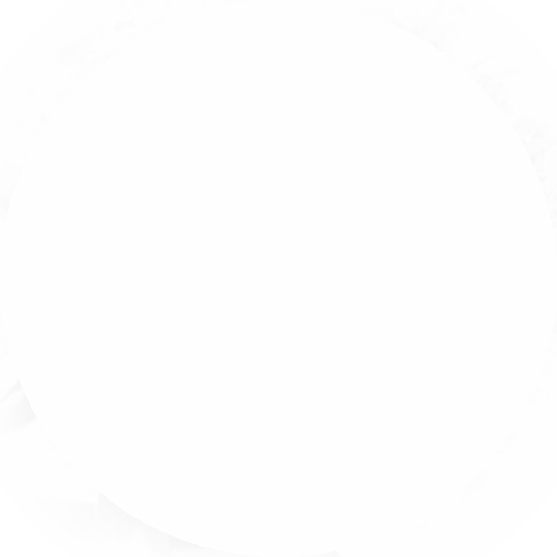

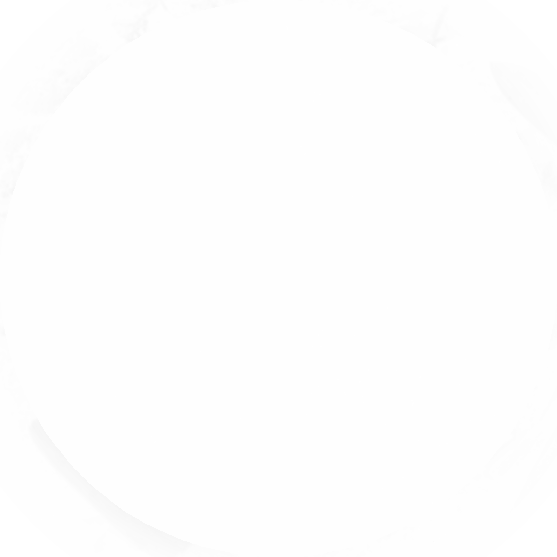

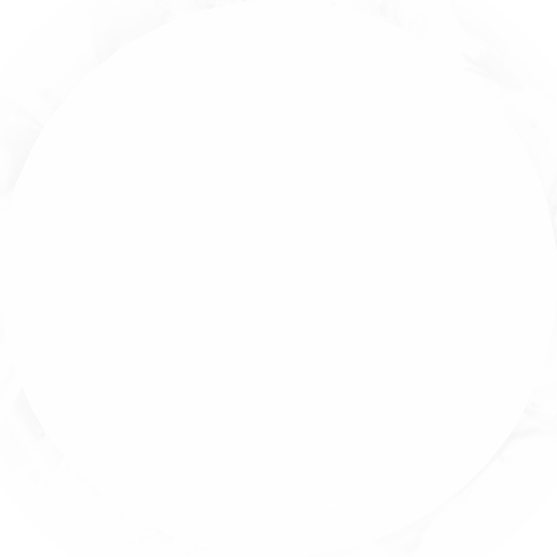

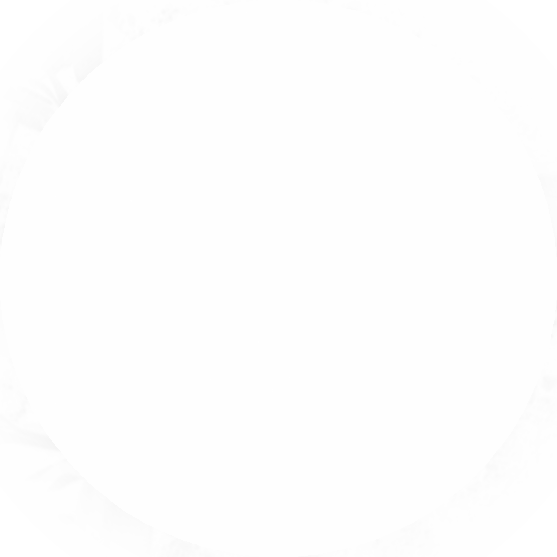

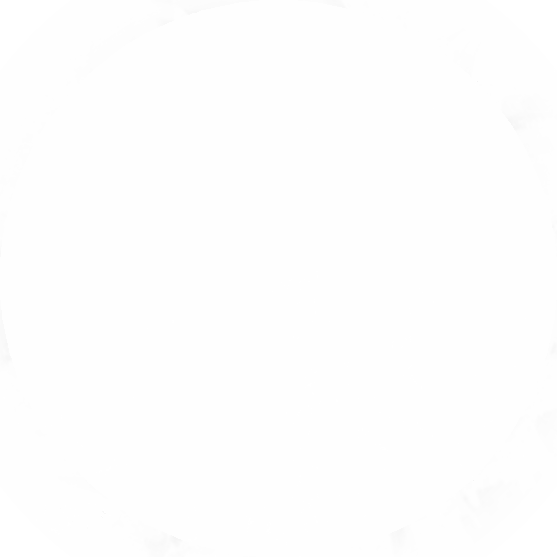

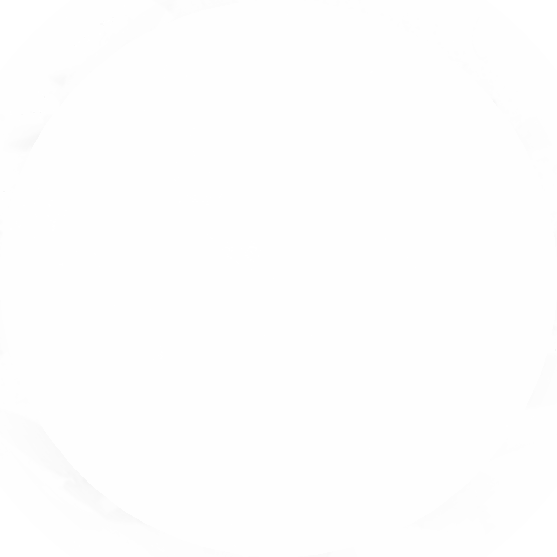

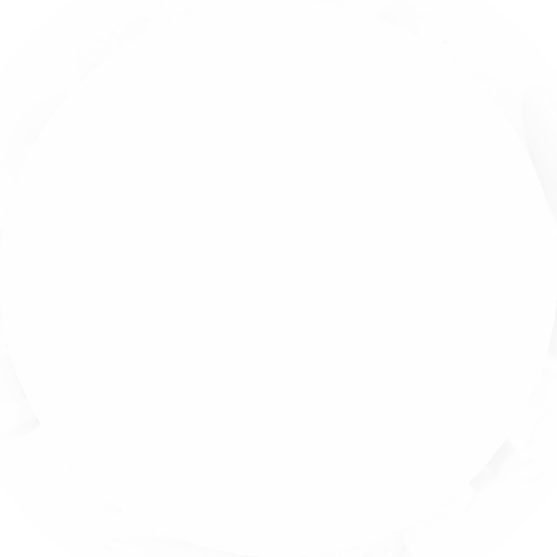

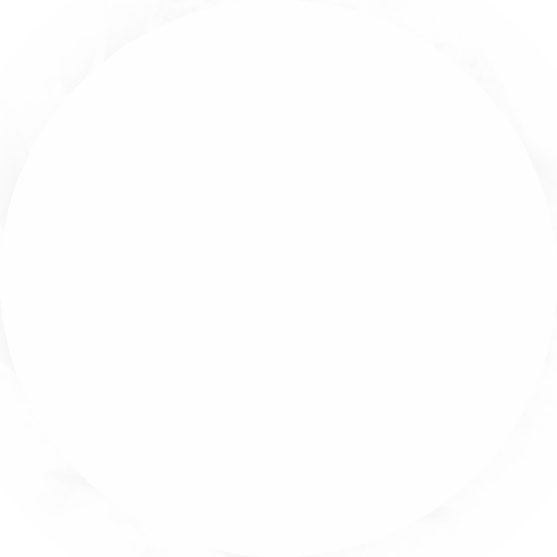

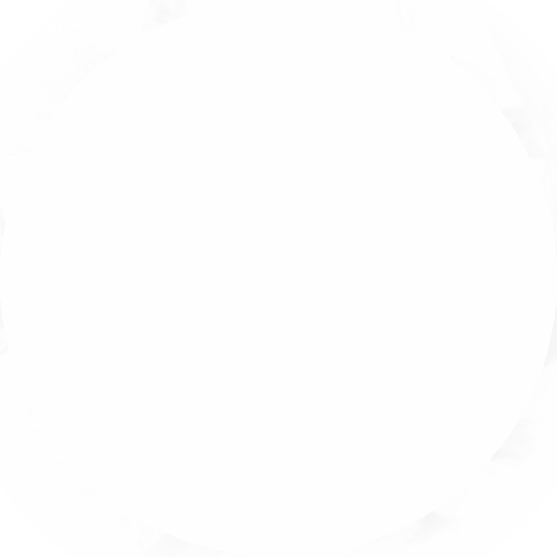

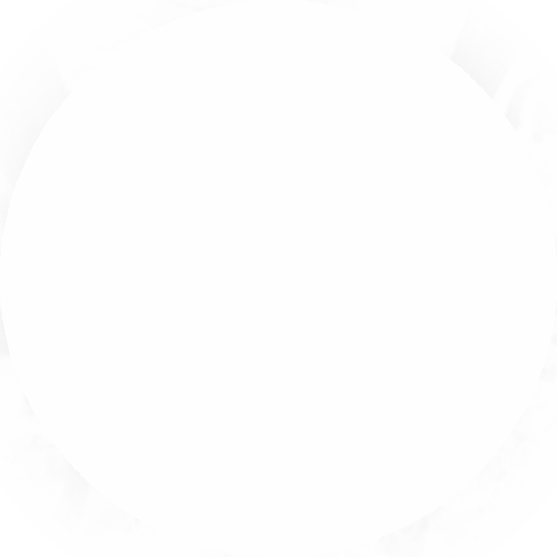

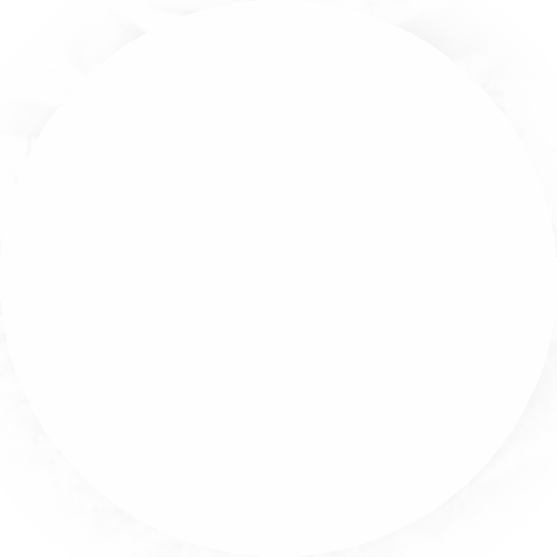

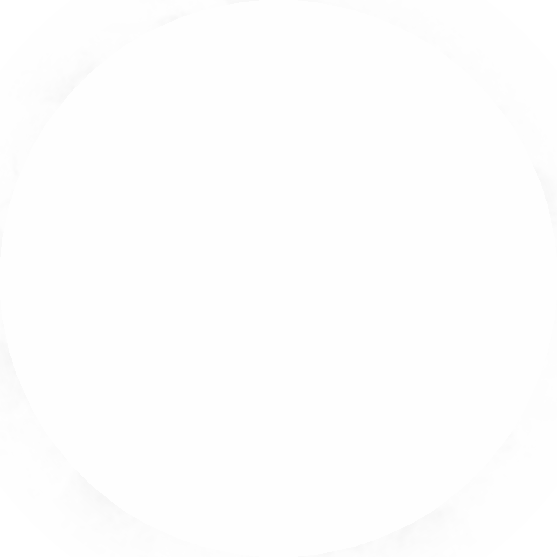

In [258]:
input_path = 'Z:/All_Staff/home/lan/Data/stimulus_image/McGill/Shadows_high_reso/'
save_path = 'C:/Users/lan/Documents/repos/inter/code/mwork/cut/'

input_img = 'merry_mexico0141.TIF'
chunk_height = grating_diameter
chunk_width = grating_diameter

gmask(input_path, input_img, chunk_height, chunk_width, save_path)

# Apply Gaussian mask on image
## construct Gaussian mask

In [ ]:
'''
https://mworks.tenderapp.com/discussions/questions/1296
https://mworks.tenderapp.com/discussions/problems/271-gaussian-mask-issue
https://mworks.tenderapp.com/discussions/questions/736#comment_43095821
https://mworks.github.io/documentation/0.8/components/drifting_grating_stimulus.html

Gaussian mask is computed on a 2x2 square, centered at the origin
dist is distance from the center
The mask is then stretched to cover a rectangle of x_size by y_size degrees. If the x and y sizes are equal, then the mask is scaled by size/2 in both directions, so std_dev has units of size/2 degrees

central region of the mask can have values greater than one (see https://mworks.tenderapp.com/discussions/problems/271-gaussian-mask-issue). However, the mask value is used as the output color's alpha, which is clamped to the range [0,1]. Hence, every pixel in the central region gets an alpha of 1.
'''

In [189]:
# replicate mwork gaussian mask. check if reasonable
# for grating we used, mean=0.1 & std=0.3

mask_mean = 0.225
mask_std = 0.3 # std_dev in mwork

u = np.linspace(-1, 1, grating_diameter, endpoint=True) # nstep = grating_diameter in terms of pixel number
[x, y] = np.meshgrid(u, u)
y = y[::-1] # ensure y axis points upwards

distance = np.sqrt(x**2 + y**2)
mask = np.exp(-1/2 * ((distance-mask_mean) / mask_std)**2) / (mask_std * np.sqrt(2*np.pi)) # default drifting grating has normalization term

# ax1 = plt.subplot(121)
# ax1 = sns.heatmap(x, annot=True, cbar=False)
# ax2 = plt.subplot(122)
# ax2 = sns.heatmap(y, annot=True, cbar=False)

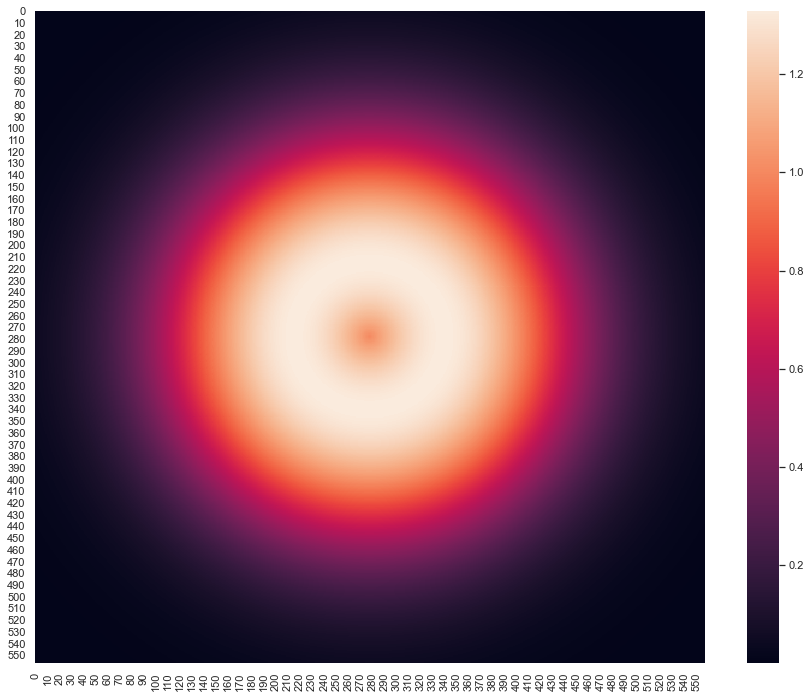

In [196]:
plt.figure(figsize=(15,12))
sns.heatmap(mask, annot=False, fmt=".1g", cbar=True)

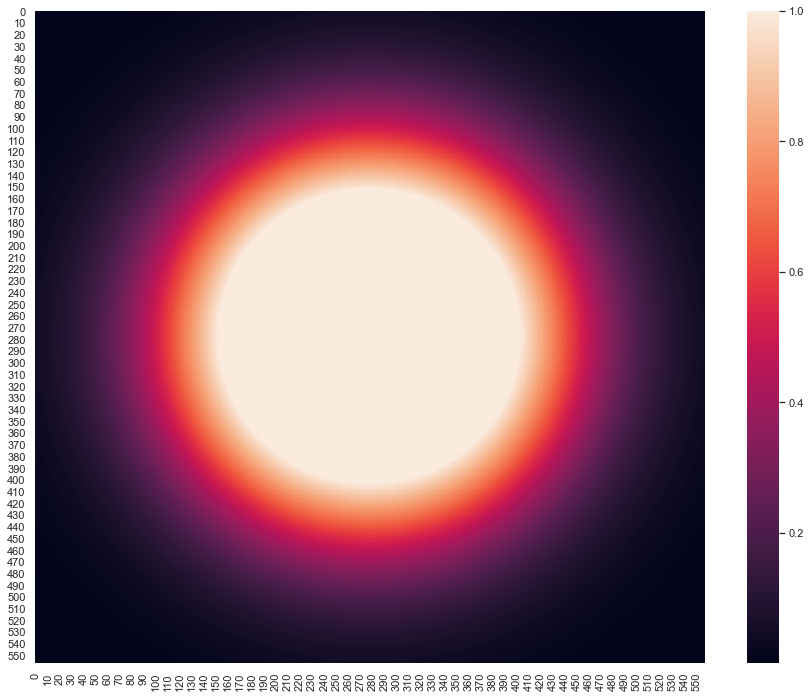

In [197]:
mask_flat_peak = mask.copy()
mask_flat_peak[mask_flat_peak>1.0] = 1.0 # equivalent to 

plt.figure(figsize=(15,12))
sns.heatmap(mask_flat_peak, annot=False, fmt=".1g", cbar=True)

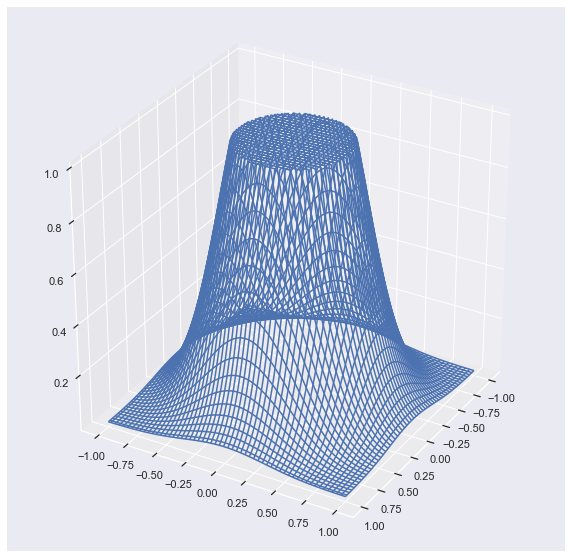

In [200]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,mask_flat_peak, rstride=10, cstride=10)
ax.view_init(elev=30, azim=30)

In [206]:
mask_flat_peak.flatten().min(), mask_flat_peak.flatten().max()

(0.0005147686744388552, 1.0)

## add Gaussian mask as alpha

In [224]:
t = 'C:/Users/lan/Documents/repos/inter/code/mwork/cut/merry_mexico0141_11.png'
im = Image.open(t)
# display(im)
gray = np.array(im)

alpha_channel = mask_flat_peak
gray = np.dstack((gray, alpha_channel))
# display(Image.fromarray(gray))
gray.shape

(557, 557, 3)

In [227]:
im = Image.open(t).convert('L')

# Make into Numpy array of RGB and get dimensions
RGB = np.array(im)
h, w = RGB.shape[:2]

RGBA = np.dstack((RGB, np.zeros((h,w),dtype=np.uint8)+255))
mBlack = (RGBA[:, :, 0:3] == [0,0,0]).all(2)


<ipython-input-227-b22e8f72b2f7>:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  mBlack = (RGBA[:, :, 0:3] == [0,0,0]).all(2)


AttributeError: 'bool' object has no attribute 'all'

In [ ]:
# Load image and ensure it is 3-channel RGB...
# ... not 1-channel greyscale, not 4-channel RGBA, not 1-channel palette
im = Image.open(t).convert('L')

# Make into Numpy array of RGB and get dimensions
RGB = np.array(im)
h, w = RGB.shape[:2]

# Add an alpha channel, fully opaque (255)
RGBA = np.dstack((RGB, np.zeros((h,w),dtype=np.uint8)+255))

# Make mask of black pixels - mask is True where image is black
mBlack = (RGBA[:, :, 0:3] == [0,0,0]).all(2)

# Make all pixels matched by mask into transparent ones
RGBA[mBlack] = (0,0,0,0)

# Convert Numnpy array back to PIL Image and save
Image.fromarray(RGBA).save('result.png')

# Calculate img stats